#                                       **Analysing Pollution Data**

##                                                      **Murtaza Haji**

                                        haji.m@husky.neu.edu  |  INFO 7245  

# Abstract

Urban air pollution increases morbidity and mortality through respiratory and cardiovascular impacts, and understanding and predicting it is a significant public health challenge[2]. We are attempting to predict the Air Quality Index(AQI) of a geographical region using data from the United States Environmental Protection Agency(EPA).The model will be designed as being able to generate real-time results so as to aid citizens' and public health officials' decisions[4].

# Introduction

Accurately modeling and predicting air quality is an important public health priority because exposure to air pollution causes negative health impacts, primarily on the respiratory and cardiovascular systems. Urban pollution can be particularly difficult to model based on physical and chemical properties due to the unique airflow in street canyons and the myriad of variable sources. All though neural networks are known to perform better, especially Artificial Neural Networks(ANN's) than simple regression models, for the purpose of this assignment we will implement simple regression models.[3]

# Code with Documentation

# Loading Packages from Anaconda Environment[5],[6],[7],[8],[9].

In [572]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 16,10
plt.rcParams["axes.labelsize"] = 30
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
# from mpl_toolkits.basemap import Basemap

In [573]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Loading dataset[1]

In [574]:
df = pd.read_csv("C:\\Users\\murta\\Downloads\\daily_42602_2017\\daily_42602_2017.csv")

In [575]:
df.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,8,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-10-12
1,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,12,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-10-12
2,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,24,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-10-12
3,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,19,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-10-12
4,1,73,23,42602,1,33.553056,-86.815,WGS84,Nitrogen dioxide (NO2),1 HOUR,...,21,200,Teledyne-API Model 200EUP or T200UP - Photolyt...,North Birmingham,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,"Birmingham-Hoover, AL",2017-10-12


In [576]:
df = shuffle(df)

In [577]:
df.shape

(85698, 29)

# Data Splice

In [578]:
df = df[0:10000]

In [579]:
df.isnull().sum()

State Code               0
County Code              0
Site Num                 0
Parameter Code           0
POC                      0
Latitude                 0
Longitude                0
Datum                    0
Parameter Name           0
Sample Duration          0
Pollutant Standard       0
Date Local               0
Units of Measure         0
Event Type               0
Observation Count        0
Observation Percent      0
Arithmetic Mean          0
1st Max Value            0
1st Max Hour             0
AQI                      0
Method Code              0
Method Name              0
Local Site Name        804
Address                  0
State Name               0
County Name              0
City Name                0
CBSA Name              764
Date of Last Change      0
dtype: int64

# Drop Null Values

In [580]:
df.dropna(inplace = True)

In [581]:
df.shape

(8505, 29)

# Load Data Dictionary

In [582]:
df_dict = pd.read_excel("C:\\Users\\murta\\Documents\\dict2.xlsx")

In [583]:
df_dict.head()

,Column1,Column2
0,name,description
1,State Code,The FIPS code of the state in which the monito...
2,County Code,The FIPS code of the county in which the monit...
3,Site Num,A unique number within the county identifying ...
4,Parameter Code,The AQS code corresponding to the parameter me...


In [584]:
df_dict.rename(columns=df_dict.iloc[0], inplace=True)

In [585]:
df_dict.head()

,name,description
0,name,description
1,State Code,The FIPS code of the state in which the monito...
2,County Code,The FIPS code of the county in which the monit...
3,Site Num,A unique number within the county identifying ...
4,Parameter Code,The AQS code corresponding to the parameter me...


In [586]:
df_dict.drop(df_dict.index[0],inplace=True)

In [587]:
df_dict.head()

,name,description
1,State Code,The FIPS code of the state in which the monito...
2,County Code,The FIPS code of the county in which the monit...
3,Site Num,A unique number within the county identifying ...
4,Parameter Code,The AQS code corresponding to the parameter me...
5,POC,This is the “Parameter Occurrence Code” used t...


In [588]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [589]:
df_dict.name

1              State Code
2             County Code
3                Site Num
4          Parameter Code
5                     POC
6                Latitude
7               Longitude
8                   Datum
9          Parameter Name
10        Sample Duration
11     Pollutant Standard
12             Date Local
13       Units of Measure
14             Event Type
15      Observation Count
16    Observation Percent
17        Arithmetic Mean
18          1st Max Value
19           1st Max Hour
20                    AQI
21            Method Code
22            Method Name
23        Local Site Name
24                Address
25             State Name
26            County Name
27              City Name
28              CBSA Name
29    Date of Last Change
Name: name, dtype: object

In [590]:
dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
dtypes = dtypes.reset_index()

In [591]:
dtypes['name'] = dtypes['index']
dtypes = dtypes[['name','dtypes']]

In [592]:
dtypes['first value'] = df.loc[659].values
preview = dtypes.merge(df_dict, on='name',how='left')

In [593]:
preview.head()

,name,dtypes,first value,description
0,State Code,int64,4,The FIPS code of the state in which the monito...
1,County Code,int64,13,The FIPS code of the county in which the monit...
2,Site Num,int64,19,A unique number within the county identifying ...
3,Parameter Code,int64,42602,The AQS code corresponding to the parameter me...
4,POC,int64,1,This is the “Parameter Occurrence Code” used t...


In [594]:
preview[:10]

,name,dtypes,first value,description
0,State Code,int64,4,The FIPS code of the state in which the monito...
1,County Code,int64,13,The FIPS code of the county in which the monit...
2,Site Num,int64,19,A unique number within the county identifying ...
3,Parameter Code,int64,42602,The AQS code corresponding to the parameter me...
4,POC,int64,1,This is the “Parameter Occurrence Code” used t...
5,Latitude,float64,33.4838,The monitoring site’s angular distance north o...
6,Longitude,float64,-112.143,The monitoring site’s angular distance east of...
7,Datum,object,WGS84,The Datum associated with the Latitude and Lon...
8,Parameter Name,object,Nitrogen dioxide (NO2),The name or description assigned in AQS to the...
9,Sample Duration,object,1 HOUR,The length of time that air passes through the...


In [595]:
print(df['State Name'].value_counts())

California              2016
Texas                   1076
Massachusetts            323
Florida                  291
Louisiana                279
Wyoming                  271
Ohio                     244
Colorado                 242
New Jersey               219
Virginia                 196
Arizona                  192
North Carolina           182
New Mexico               180
Nevada                   160
Illinois                 154
North Dakota             140
Missouri                 127
Indiana                  125
New York                 117
Oklahoma                 117
Utah                     116
Tennessee                115
Pennsylvania             114
Kentucky                 112
Rhode Island             110
District Of Columbia     108
South Carolina            98
Georgia                   94
Minnesota                 92
Maryland                  85
Iowa                      72
Kansas                    71
Arkansas                  71
South Dakota              71
Maine         

# Start of Exploratory Data Analysis

In [596]:
preview[10:20]

,name,dtypes,first value,description
10,Pollutant Standard,object,NO2 1-hour,A description of the ambient air quality stand...
11,Date Local,object,2017-02-15,The calendar date for the summary. All daily s...
12,Units of Measure,object,Parts per billion,The unit of measure for the parameter. QAD alw...
13,Event Type,object,None,Indicates whether data measured during excepti...
14,Observation Count,int64,24,The number of observations (samples) taken dur...
15,Observation Percent,float64,100,The percent representing the number of observa...
16,Arithmetic Mean,float64,13.25,The average (arithmetic mean) value for the day.
17,1st Max Value,float64,42,The highest value for the day.
18,1st Max Hour,int64,21,The hour (on a 24-hour clock) when the highest...
19,AQI,int64,40,The Air Quality Index for the day for the poll...


In [597]:
preview[20:]

,name,dtypes,first value,description
20,Method Code,int64,99,An internal system code indicating the method ...
21,Method Name,object,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,"A short description of the processes, equipmen..."
22,Local Site Name,object,WEST PHOENIX,The name of the site (if any) given by the Sta...
23,Address,object,3847 W EARLL DR-WEST PHOENIX STATION,The approximate street address of the monitori...
24,State Name,object,Arizona,The name of the state where the monitoring sit...
25,County Name,object,Maricopa,The name of the county where the monitoring si...
26,City Name,object,Phoenix,The name of the city where the monitoring site...
27,CBSA Name,object,"Phoenix-Mesa-Scottsdale, AZ",The name of the core bases statistical area (m...
28,Date of Last Change,object,2017-09-21,The date the last time any numeric values in t...


In [598]:
df.iloc[0]

State Code                                                     48
County Code                                                   201
Site Num                                                     1052
Parameter Code                                              42602
POC                                                             1
Latitude                                                  29.8145
Longitude                                                -95.3877
Datum                                                       WGS84
Parameter Name                             Nitrogen dioxide (NO2)
Sample Duration                                            1 HOUR
Pollutant Standard                                     NO2 1-hour
Date Local                                             2017-05-12
Units of Measure                                Parts per billion
Event Type                                                   None
Observation Count                                              24
Observatio

In [599]:
df.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,8505.000000,8505.000000,8505.000000,8505.0,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000
mean,26.083363,82.451264,845.998001,42602.0,1.144738,36.760869,-97.775534,22.974015,95.809406,8.134946,17.508971,10.988125,16.230218,138.137684
std,17.468154,104.459132,1669.093106,0.0,0.571635,4.932286,17.291178,2.199516,9.134655,7.008794,12.686546,7.739587,11.959152,139.730111
min,1.000000,1.000000,1.000000,42602.0,1.000000,21.323745,-159.366240,1.000000,4.000000,-4.529167,-4.000000,0.000000,0.000000,35.000000
25%,6.000000,19.000000,11.000000,42602.0,1.000000,33.447867,-116.541010,23.000000,96.000000,2.995833,7.100000,5.000000,7.000000,74.000000
50%,25.000000,49.000000,44.000000,42602.0,1.000000,36.867125,-95.492650,24.000000,100.000000,6.166667,14.900000,8.000000,13.000000,99.000000
75%,44.000000,99.000000,1011.000000,42602.0,1.000000,40.617488,-82.640410,24.000000,100.000000,11.416667,25.300000,19.000000,24.000000,99.000000
max,56.000000,760.000000,9997.000000,42602.0,6.000000,64.845690,-69.785000,24.000000,100.000000,56.125000,78.800000,23.000000,77.000000,599.000000


In [600]:
ob_less_50 = df.loc[df['Observation Percent'] < 50]

In [601]:
ob_less_50.shape

(85, 29)

In [602]:
df = df.loc[df['Observation Percent'] > 50]

In [603]:
df.shape

(8408, 29)

In [604]:
df.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,8408.000000,8408.000000,8408.000000,8408.0,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000
mean,26.060181,82.376665,846.689462,42602.0,1.145457,36.765756,-97.796761,23.147241,96.530923,8.112184,17.532766,10.980495,16.252617,138.103116
std,17.466464,104.241365,1670.381715,0.0,0.573917,4.934308,17.303266,1.463148,6.051659,6.964914,12.678908,7.735754,11.952015,139.730132
min,1.000000,1.000000,1.000000,42602.0,1.000000,21.323745,-159.366240,13.000000,54.000000,-4.529167,-4.000000,0.000000,0.000000,35.000000
25%,6.000000,19.000000,11.000000,42602.0,1.000000,33.457930,-116.541010,23.000000,96.000000,2.995833,7.200000,5.000000,7.000000,74.000000
50%,25.000000,49.000000,44.000000,42602.0,1.000000,36.867125,-95.492650,24.000000,100.000000,6.160417,15.000000,8.000000,14.000000,99.000000
75%,44.000000,99.000000,1011.000000,42602.0,1.000000,40.617488,-82.640410,24.000000,100.000000,11.382143,25.300000,19.000000,24.000000,99.000000
max,56.000000,760.000000,9997.000000,42602.0,6.000000,64.845690,-69.785000,24.000000,100.000000,56.125000,78.800000,23.000000,77.000000,599.000000


In [605]:
max_val = df.loc[df['1st Max Value'] < 0 ]

In [606]:
max_val.shape

(11, 29)

In [607]:
df = df.loc[df['1st Max Value'] > 0]

In [608]:
df.describe()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI,Method Code
count,8362.000000,8362.000000,8362.000000,8362.0,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000,8362.000000
mean,26.107869,82.450251,843.510285,42602.0,1.145300,36.769234,-97.726336,23.150203,96.542932,8.160264,17.630830,11.020091,16.342023,138.370486
std,17.463570,104.441720,1670.529559,0.0,0.574178,4.935682,17.273396,1.459141,6.035032,6.953205,12.644248,7.724030,11.923729,140.054856
min,1.000000,1.000000,1.000000,42602.0,1.000000,21.323745,-159.366240,13.000000,54.000000,-1.872222,0.100000,0.000000,0.000000,35.000000
25%,6.000000,19.000000,11.000000,42602.0,1.000000,33.447867,-115.563060,23.000000,96.000000,3.021986,7.300000,5.000000,7.000000,74.000000
50%,25.000000,49.000000,43.000000,42602.0,1.000000,37.058220,-95.489167,24.000000,100.000000,6.208333,15.000000,8.000000,14.000000,99.000000
75%,44.000000,99.000000,1011.000000,42602.0,1.000000,40.617488,-82.640410,24.000000,100.000000,11.420833,25.400000,19.000000,24.000000,99.000000
max,56.000000,760.000000,9997.000000,42602.0,6.000000,64.845690,-69.785000,24.000000,100.000000,56.125000,78.800000,23.000000,77.000000,599.000000


# Prepare data for machine learning

In [609]:
print(df.dtypes.value_counts())

object     15
int64       9
float64     5
dtype: int64


In [610]:
numerical = df.loc[:, df.dtypes == np.float64]

In [611]:
numerical2 = df.loc[:, df.dtypes == np.int64]

In [612]:
num = pd.concat([numerical2,numerical], axis=1)

In [613]:
num

,State Code,County Code,Site Num,Parameter Code,POC,Observation Count,1st Max Hour,AQI,Method Code,Latitude,Longitude,Observation Percent,Arithmetic Mean,1st Max Value
70529,48,201,1052,42602,1,24,4,20,99,29.814530,-95.387690,100.0,5.791667,21.1
80305,53,33,80,42602,1,22,8,26,599,47.568236,-122.308628,92.0,9.709091,28.0
60503,40,143,1127,42602,1,24,18,6,599,36.204902,-95.976537,100.0,4.004167,6.3
4089,6,1,13,42602,1,23,5,26,74,37.864767,-122.302741,96.0,17.069565,28.6
19633,6,95,4,42602,1,23,23,8,74,38.102507,-122.237976,96.0,2.700000,8.9
53109,36,81,124,42602,1,24,19,27,74,40.736140,-73.821530,100.0,15.437500,29.4
51913,36,5,133,42602,1,24,4,35,74,40.867900,-73.878090,100.0,22.908333,37.1
18219,6,83,1018,42602,1,23,5,3,74,34.527440,-120.196500,96.0,1.173913,3.0
28964,15,3,10,42602,1,24,20,6,212,21.323745,-158.088613,100.0,3.291667,6.4
66931,48,121,34,42602,1,24,6,8,99,33.219069,-97.196284,100.0,4.758333,8.7


In [614]:
cat = df.loc[:, df.dtypes == object]

In [615]:
cat.head()

,Datum,Parameter Name,Sample Duration,Pollutant Standard,Date Local,Units of Measure,Event Type,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
70529,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour,2017-05-12,Parts per billion,None,INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE,Houston North Loop,822 North Loop,Texas,Harris,Houston,"Houston-The Woodlands-Sugar Land, TX",2017-10-31
80305,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour,2017-04-06,Parts per billion,None,Instrumental - Chemiluminescence Teledyne API ...,SEATTLE - BEACON HILL,4103 BEACON HILL S,Washington,King,Seattle,"Seattle-Tacoma-Bellevue, WA",2017-10-30
60503,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour,2017-08-07,Parts per billion,None,Instrumental - Chemiluminescence Teledyne API ...,NORTH TULSA - FIRE STATION#24,3520 1/2 N. PEORIA,Oklahoma,Tulsa,Tulsa,"Tulsa, OK",2017-11-02
4089,NAD83,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour,2017-06-14,Parts per billion,None,INSTRUMENTAL - CHEMILUMINESCENCE,Berkeley Aquatic Park,1 Bolivar Dr,California,Alameda,Not in a city,"San Francisco-Oakland-Hayward, CA",2017-10-25
19633,WGS84,Nitrogen dioxide (NO2),1 HOUR,NO2 1-hour,2017-05-17,Parts per billion,None,INSTRUMENTAL - CHEMILUMINESCENCE,Vallejo,304 TUOLUMNE ST.,California,Solano,Vallejo,"Vallejo-Fairfield, CA",2017-10-25


Text(0.5,1,'No. of Datums')

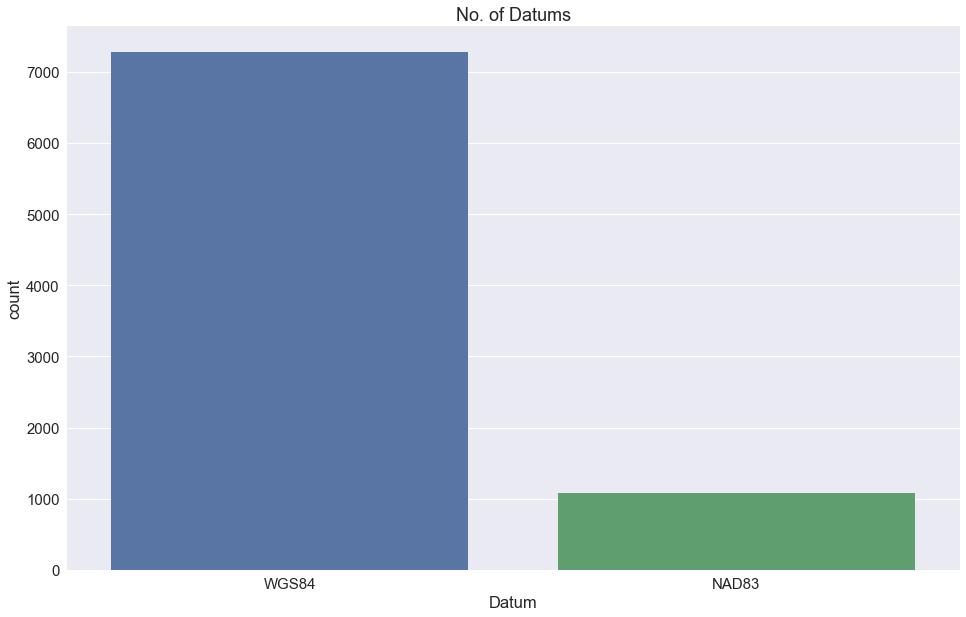

In [616]:
datum = cat['Datum']
g = sns.countplot(datum)
g.set_title("No. of Datums")

Text(0.5,1,'No of Event Types')

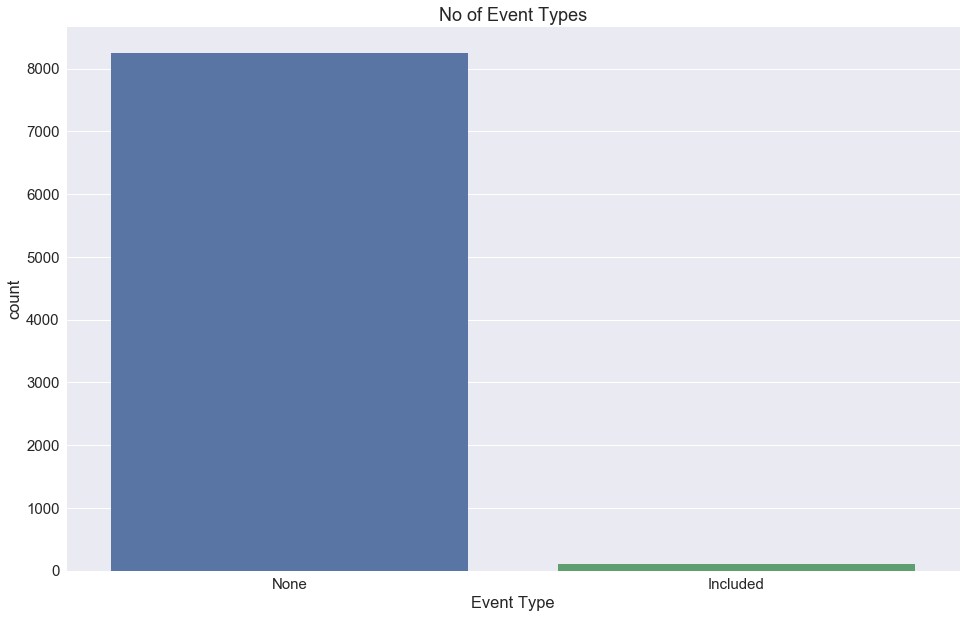

In [617]:
event_type= cat['Event Type']
g = sns.countplot(event_type)
g.set_title("No of Event Types")

Text(0.5,1,'Count Plot of Types of Measuring Instruments')

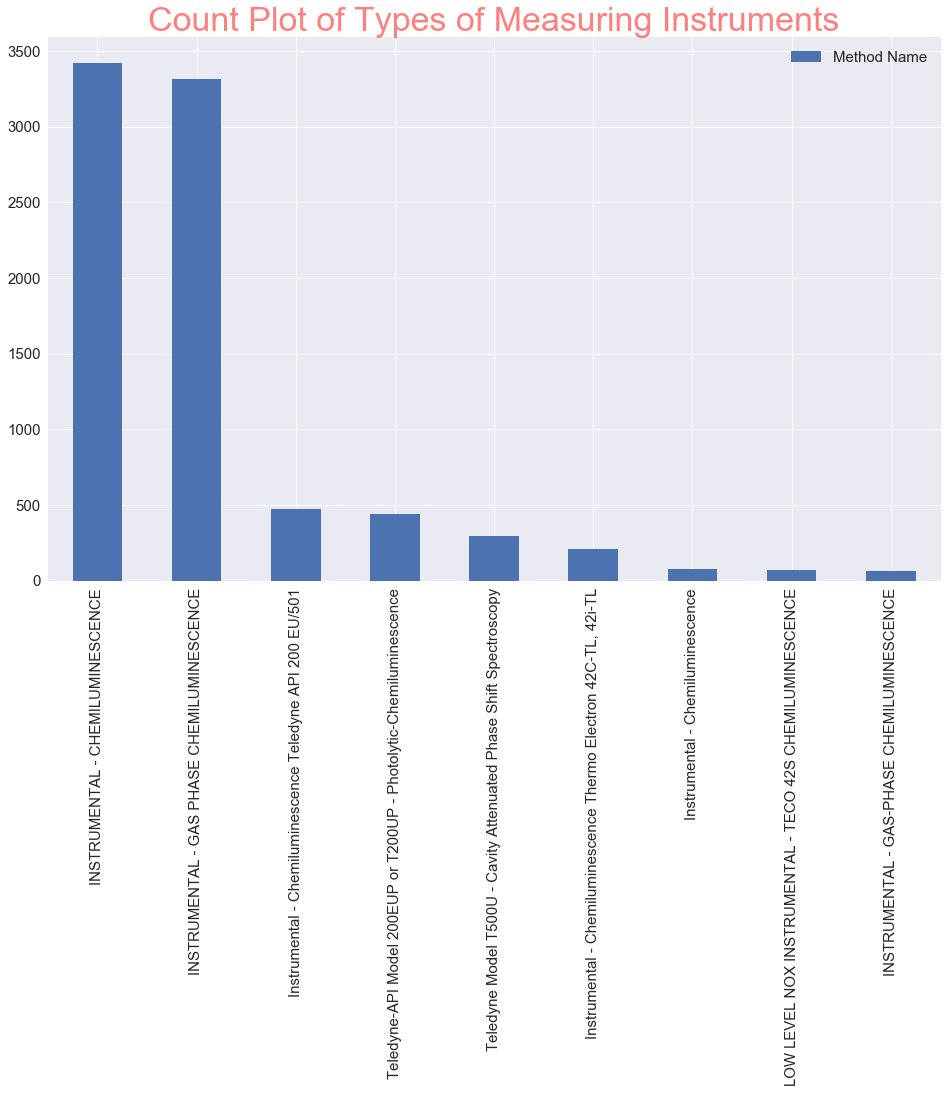

In [618]:
method_name = cat['Method Name'].value_counts()
g = method_name.plot.bar()
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.legend()
g.axes.set_title('Count Plot of Types of Measuring Instruments', fontsize=34,color="r",alpha=0.5)

In [619]:
df_dict

,name,description
1,State Code,The FIPS code of the state in which the monito...
2,County Code,The FIPS code of the county in which the monit...
3,Site Num,A unique number within the county identifying ...
4,Parameter Code,The AQS code corresponding to the parameter me...
5,POC,This is the “Parameter Occurrence Code” used t...
6,Latitude,The monitoring site’s angular distance north o...
7,Longitude,The monitoring site’s angular distance east of...
8,Datum,The Datum associated with the Latitude and Lon...
9,Parameter Name,The name or description assigned in AQS to the...
10,Sample Duration,The length of time that air passes through the...


Text(0.5,1,'Distibution of AQI')

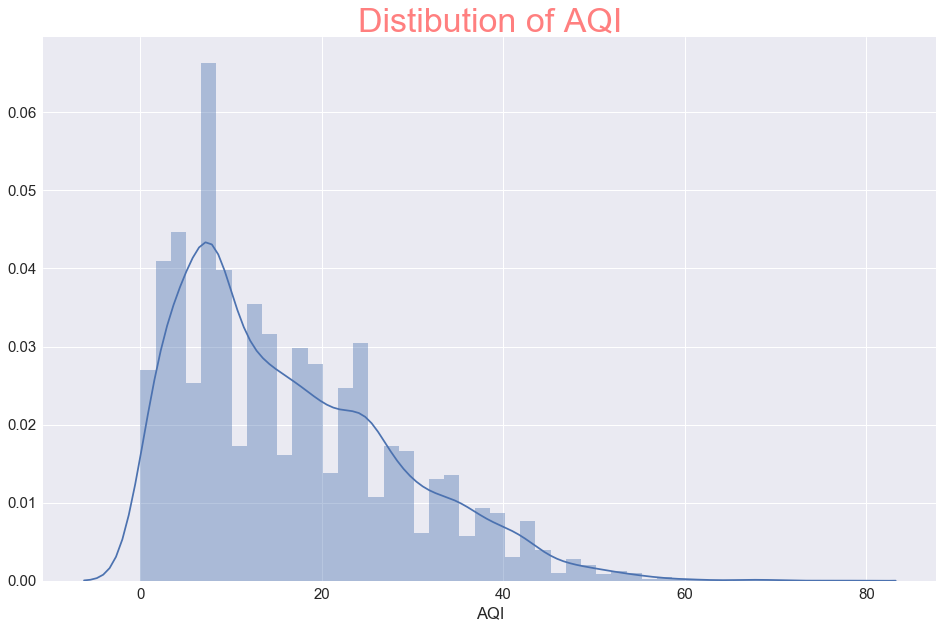

In [620]:
g = sns.distplot(df.AQI)
g.tick_params(axis='both', which = 'major', labelsize = 15 )
g.axes.set_title('Distibution of AQI', fontsize=34,color="r",alpha=0.5)

Text(0.5,1,'Distribution of 1st Max Hour')

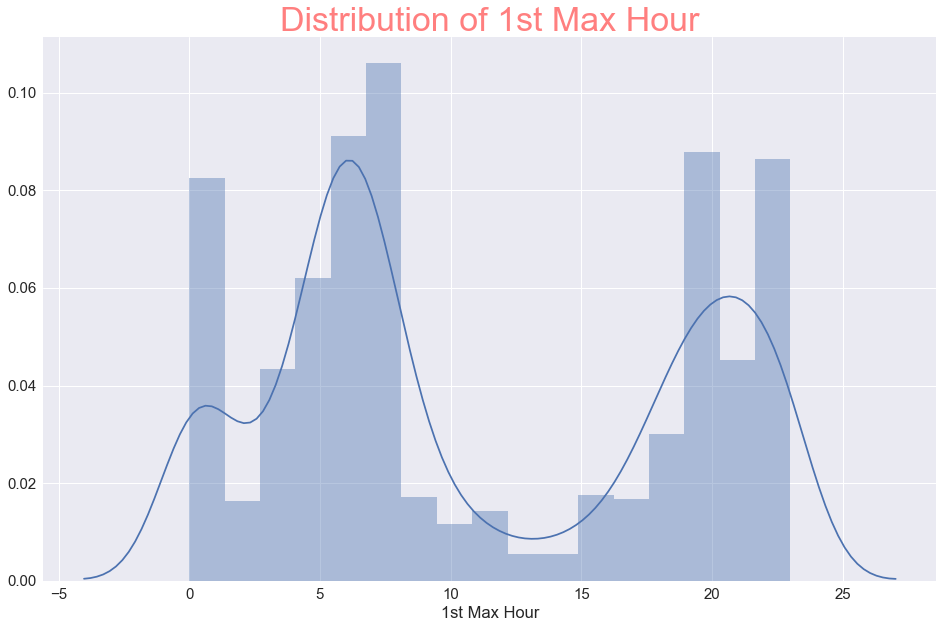

In [621]:
g = sns.distplot(df['1st Max Hour'])
g.tick_params(axis='both', which = 'major', labelsize = 15 )
g.axes.set_title('Distribution of 1st Max Hour', fontsize=34,color="r",alpha=0.5)

Text(0.5,1,'Distribution of 1st Max Value')

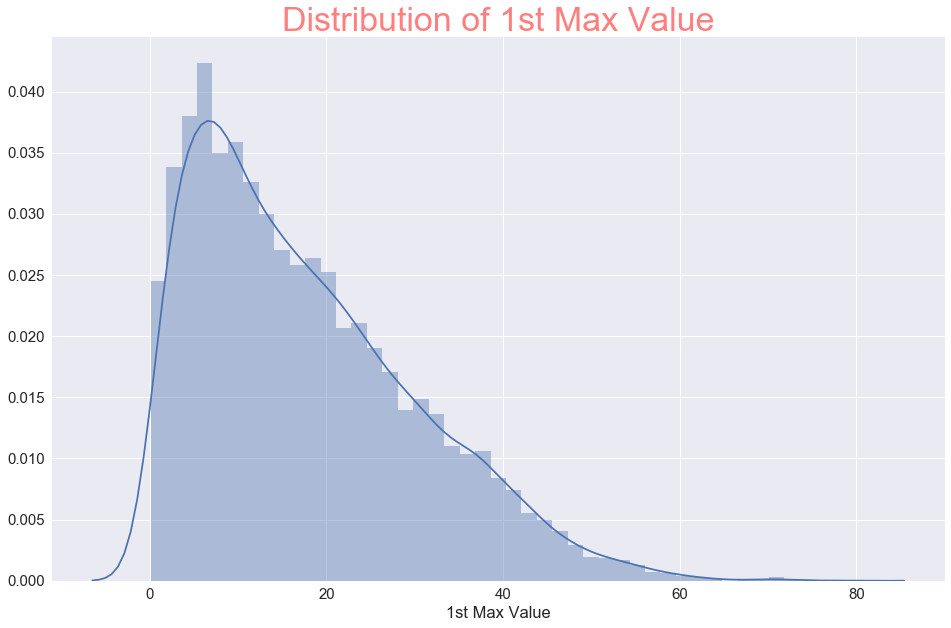

In [622]:
g = sns.distplot(df['1st Max Value'])
g.tick_params(axis='both', which = 'major', labelsize = 15 )
g.axes.set_title('Distribution of 1st Max Value', fontsize=34,color="r",alpha=0.5)

Text(0.5,1,'Values recorded per State')

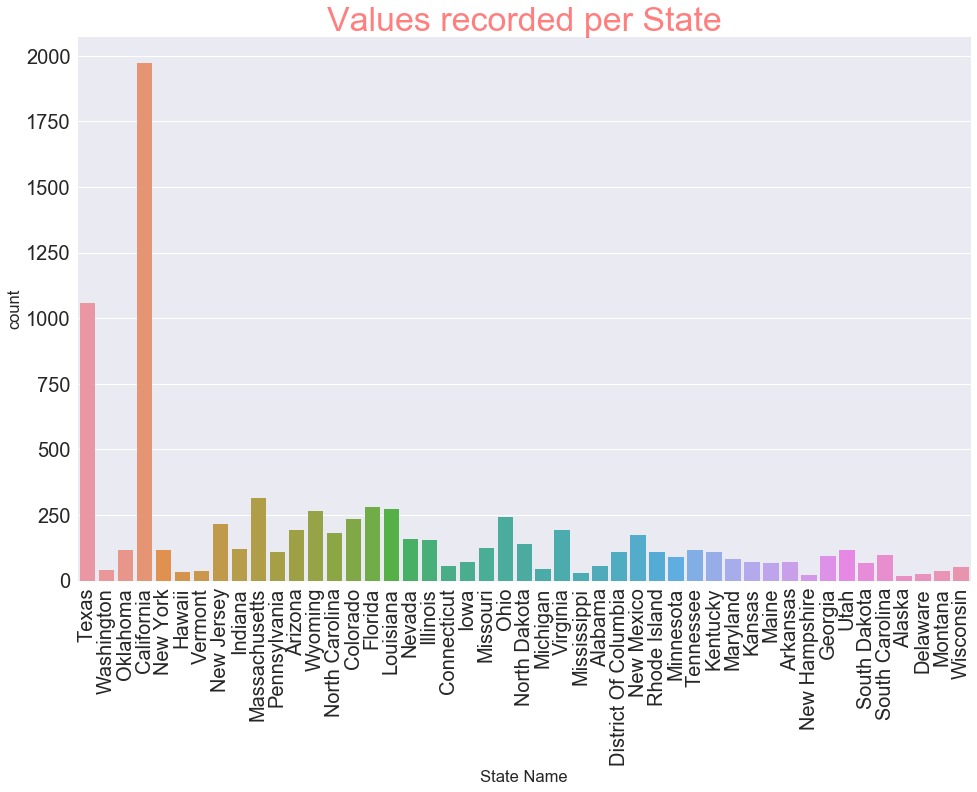

In [623]:
g = sns.countplot(df['State Name'])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.legend()
g.tick_params(axis='both', which='major', labelsize=20)
g.tick_params(axis='both', which='minor', labelsize=30)
g.axes.set_title('Values recorded per State', fontsize=34,color="r",alpha=0.5)

In [624]:
df_top10 = df['State Name'].groupby(df['State Name']).value_counts().nlargest(10)

In [625]:
print(df_top10)

State Name     State Name   
California     California       1973
Texas          Texas            1057
Massachusetts  Massachusetts     315
Florida        Florida           281
Louisiana      Louisiana         275
Wyoming        Wyoming           267
Ohio           Ohio              241
Colorado       Colorado          235
New Jersey     New Jersey        217
Virginia       Virginia          193
Name: State Name, dtype: int64


In [626]:
df_trimmed = df.loc[df['State Name'].isin(['California','Texas','Massachusetts','Florida','Louisiana'])]

In [627]:
df_trimmed.shape

(3901, 29)

Text(0.5,1,'Violin Plot of AQI')

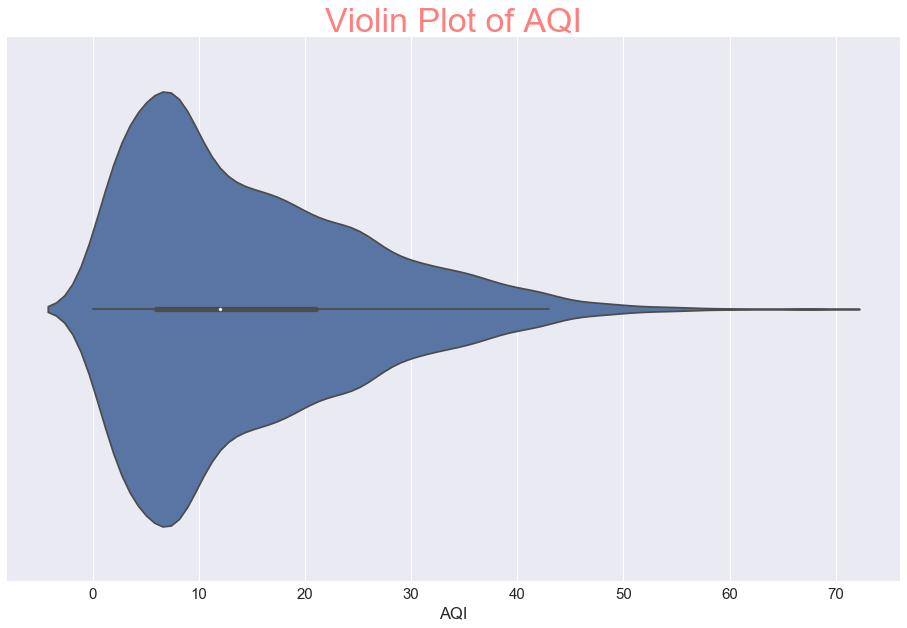

In [628]:
g = sns.violinplot(x = "AQI", data=df_trimmed)
g.axes.set_title('Violin Plot of AQI', fontsize=34,color="r",alpha=0.5)

Text(0.5,1,'Scatterplot of top 5 States Vs AQI')

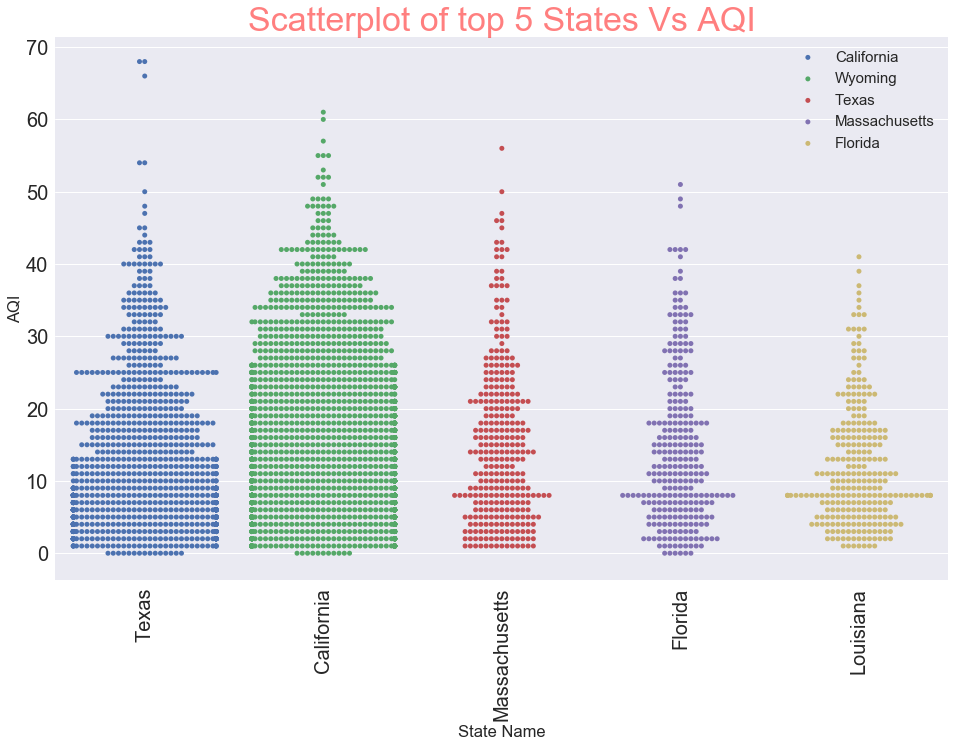

In [629]:
g = sns.swarmplot(x="State Name", y="AQI", data=df_trimmed)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.legend(['California','Wyoming','Texas','Massachusetts','Florida'])
g.tick_params(axis='both', which = 'major', labelsize = 20 )
g.axes.set_title('Scatterplot of top 5 States Vs AQI', fontsize=34,color="r",alpha=0.5)

In [630]:
shayad_outlier = df_trimmed.loc[df_trimmed['AQI'] > 60]

In [631]:
County_name = shayad_outlier.groupby('County Name')

In [632]:
list(County_name)

[('El Paso',
         State Code  County Code  Site Num  Parameter Code  POC   Latitude  \
  67620          48          141        44           42602    1  31.765685   
  67392          48          141        37           42602    1  31.768291   
  67413          48          141        37           42602    1  31.768291   
  
          Longitude  Datum          Parameter Name Sample Duration  \
  67620 -106.455227  WGS84  Nitrogen dioxide (NO2)          1 HOUR   
  67392 -106.501260  WGS84  Nitrogen dioxide (NO2)          1 HOUR   
  67413 -106.501260  WGS84  Nitrogen dioxide (NO2)          1 HOUR   
  
                ...          AQI Method Code  \
  67620         ...           68          99   
  67392         ...           66          99   
  67413         ...           68          99   
  
                                        Method Name   Local Site Name  \
  67620  INSTRUMENTAL - GAS PHASE CHEMILUMINESCENCE  El Paso Chamizal   
  67392  INSTRUMENTAL - GAS PHASE CHEMILUMINESCE

Text(0.5,1,'Scatter Plot of County Vs AQI')

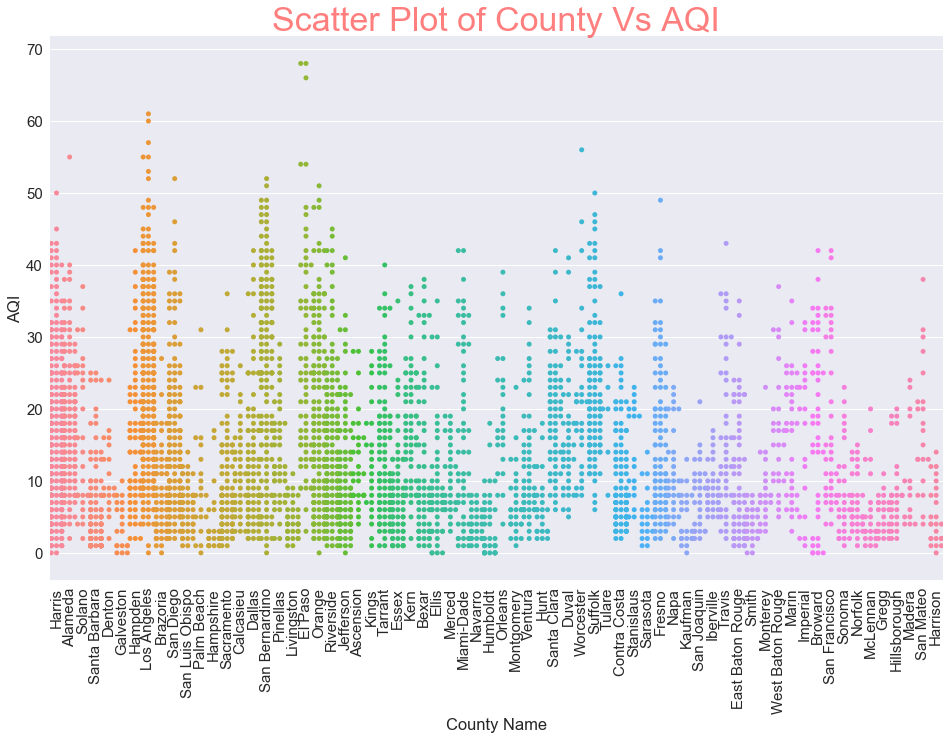

In [633]:
g = sns.swarmplot(x="County Name", y="AQI", data=df_trimmed)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.tick_params(axis='both', which = 'major', labelsize = 15 )
g.axes.set_title('Scatter Plot of County Vs AQI', fontsize=34,color="r",alpha=0.5)

In [634]:
# data = df[df['AQI'] > 30].sort_values('Local Site Name').head(10)

Text(0.5,1,'NO2 Content Vs AQI')

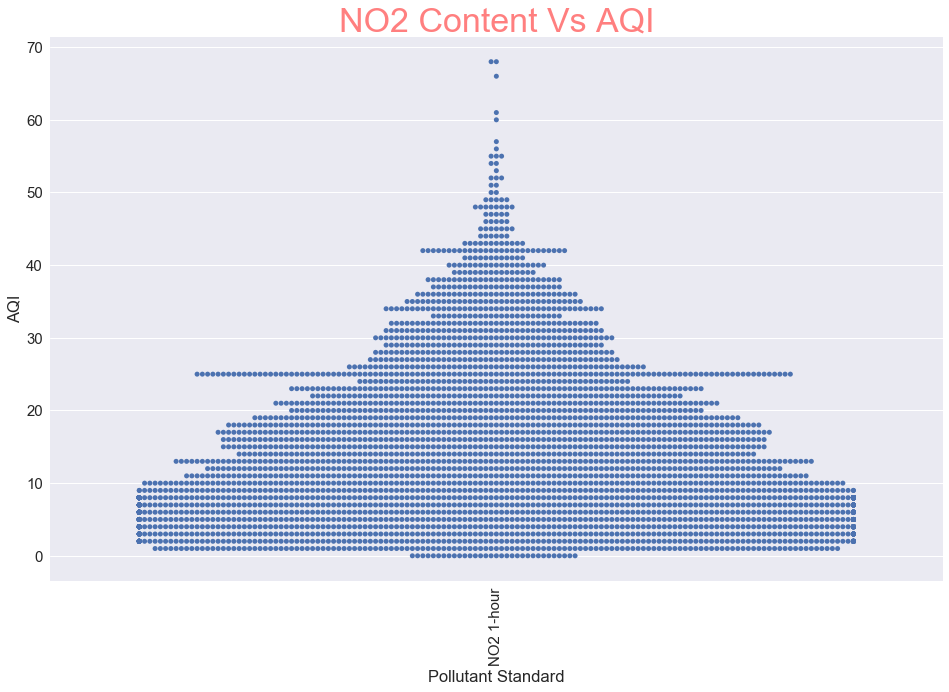

In [635]:
g = sns.swarmplot(x="Pollutant Standard", y="AQI", data=df_trimmed)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.tick_params(axis='both', which = 'major', labelsize = 15 )
g.axes.set_title('NO2 Content Vs AQI', fontsize=34,color="r",alpha=0.5)

Text(0.5,1,'Observations Recorded ')

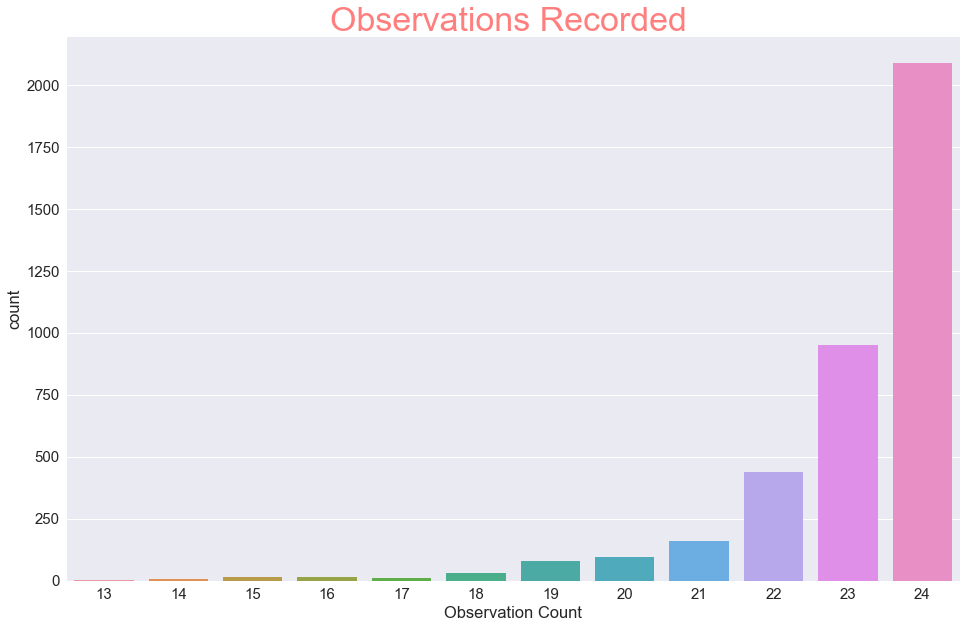

In [636]:
g = sns.countplot(df_trimmed['Observation Count'])
g.axes.set_title('Observations Recorded ', fontsize=34,color="r",alpha=0.5)

# Finding Corelation between variables

In [637]:
corr = df_trimmed.corr()

Text(0.5,1,'Correlation Matrix')

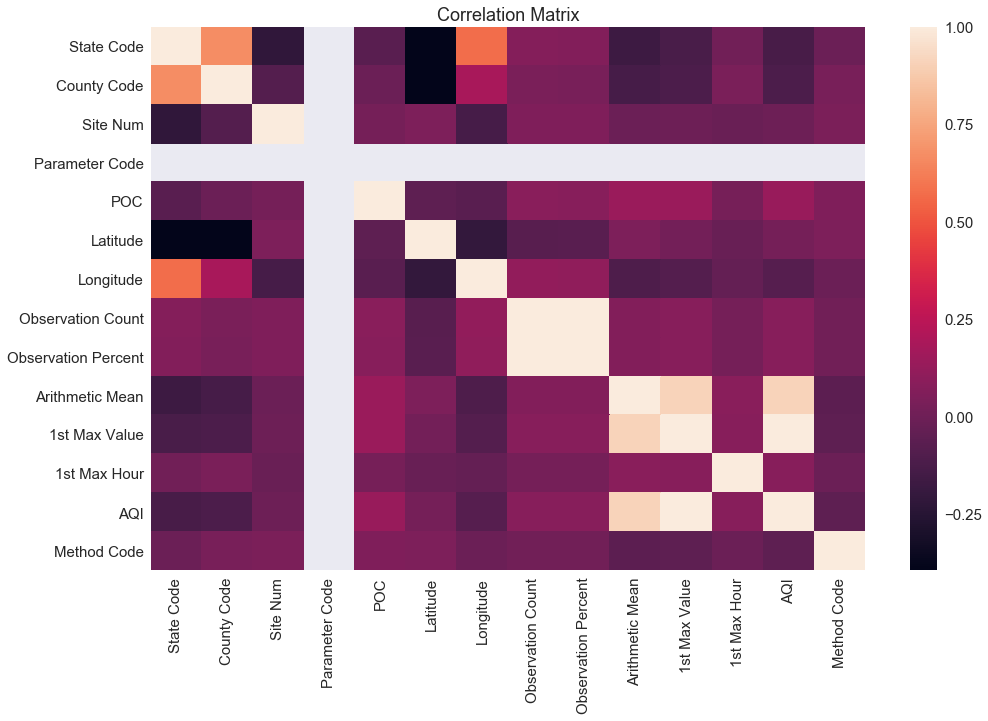

In [638]:
g = sns.heatmap(corr)
g.set_title("Correlation Matrix")

In [639]:
column_list = df.columns

In [640]:
print(column_list)

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')


In [641]:
df_encoded = df_trimmed[['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
                        'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
                        'Pollutant Standard','Event Type','Observation Count', 'Arithmetic Mean',
                        '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
                        'Local Site Name','City Name','CBSA Name']]

In [642]:
df_encoded = df_encoded.apply(LabelEncoder().fit_transform)

In [643]:
np.random.seed(0)

In [644]:
X = df_encoded[['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
                'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
                'Pollutant Standard','Event Type','Observation Count', 'Arithmetic Mean',
                '1st Max Value', '1st Max Hour', 'Method Code', 'Method Name',
                'Local Site Name','City Name','CBSA Name']]
y = df_encoded.AQI
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [645]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.248e+05
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:46:12   Log-Likelihood:                -4709.8
No. Observations:                3901   AIC:                             9452.
Df Residuals:                    3885   BIC:                             9552.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
State Code             0.0039      0

# Seems the model is overfitting as well as there is presence of columns with multicollinearity

In [646]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.46106557377049179

# Lets use Recursive Feature Elimination

In [647]:
rfe = RFE(clf, 7)
fit = rfe.fit(X, y)
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

7
[False False  True False False  True  True False False False False False
 False  True  True  True False False  True False False]
[ 8  3  1 11  9  1  1 10 12 14 15 13  4  1  1  1  6  7  1  2  5]


In [648]:
X = df_encoded[['Site Num','Latitude', 'Longitude','Arithmetic Mean',
                '1st Max Value', '1st Max Hour','Local Site Name']]
y = df_encoded.AQI
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [649]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    AQI   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.796e+05
Date:                Fri, 02 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:46:13   Log-Likelihood:                -4753.8
No. Observations:                3901   AIC:                             9522.
Df Residuals:                    3894   BIC:                             9566.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Site Num        -7.511e-05      0.000     

# Random Forest Model gives accuracy of 68%

Which isnt bad considering even small amount of NO2 can be harmful to a person

In [650]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.71311475409836067

C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\murta\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: 

LDA: 0.913614 (0.012704)
CART: 0.995387 (0.003938)
NB: 0.910028 (0.013984)


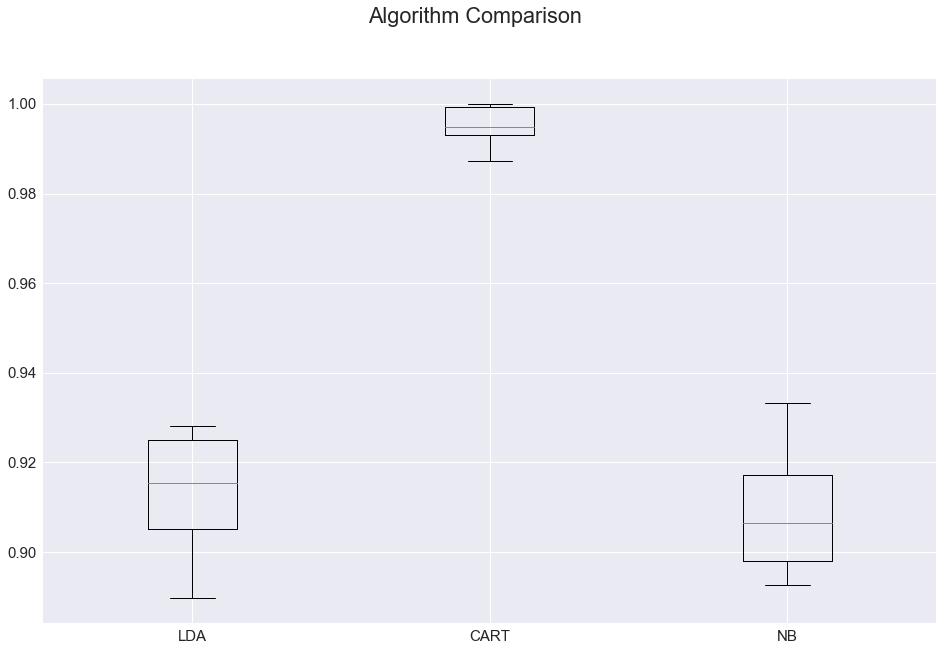

In [651]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# Results and Discussion

The plots above show a shockingly high accuracy of prediction for Air Quality Index.

The further goal  of this Assignment is to use the API provided by EPA and perform real time analysis to actually put our model to the test.

Also we have considered only one pollutant i.e(NO2) for the limited scope of this assignment. There are many more pollutants like SO2, CO etc whose values can be added to the algorithm to make it a better predictor of pollution.

# Acknowledgements

I would like to thank Professor Nicholas Brown for this awesome assignment, it really helped me brush up and revise all my work from last semester and I am now looking forward to building awesome projects with his help along with the support of the ever-helping TA's'

# References

[1] Environmental Protection Agency. Technology transfer network/air
quality system detailed data download.

[2] R W Atkinson, H R Anderson, J Sunyer, J Ayres, M Baccini, J M Vonk,
A Boumghar, F Forastiere, B Forsberg, G Touloumi, J Schwartz, and
K Katsouyanni. Acute effects of particulate air pollution on respiratory
admissions: results from aphea 2 project. air pollution and health: a
european approach. Am J Respir Crit Care Med, 164(10 Pt 1):1860-
1866, Nov 2001.

[3] Ming Cai, Yafeng Yin, and Min Xie. Prediction of hourly air pollutant
concentrations near urban arterials using artificial neural network approach.
Transportation Research Part D: Transport and Environment,
14(1):32 - 41, 2009.

[4] A machine learning model of Manhattan air pollution at high spatial resolution
Download
Author: Keeler, Rachel H. (Rachel Heiden)
Citable URI: http://hdl.handle.net/1721.1/90659
Massachusetts Institute of Technology. Department of Earth, Atmospheric, and Planetary Sciences.
Publisher: Massachusetts Institute of Technology,Date Issued: 2014.

[5] Fabian Pedregosa, Gaël Varoquaux, Alexandre Gramfort, Vincent Michel, Bertrand Thirion, Olivier Grisel, Mathieu Blondel, Peter Prettenhofer, Ron Weiss, Vincent Dubourg, Jake Vanderplas, Alexandre Passos, David Cournapeau, Matthieu Brucher, Matthieu Perrot, Édouard Duchesnay. Scikit-learn: Machine Learning in Python, Journal of Machine Learning Research, 12, 2825-2830 (2011)

[6] Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ [Online; accessed 2018-02-03].

[7] Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011), DOI:10.1109/MCSE.2011.37.

[8] Fernando Pérez and Brian E. Granger. IPython: A System for Interactive Scientific Computing, Computing in Science & Engineering, 9, 21-29 (2007), DOI:10.1109/MCSE.2007.53.

[9] John D. Hunter. Matplotlib: A 2D Graphics Environment, Computing in Science & Engineering, 9, 90-95 (2007), DOI:10.1109/MCSE.2007.55.

[10] Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010)